In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O cats_and_dogs_filtered.zip

--2020-11-15 13:44:27--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.208, 172.217.5.240, 172.217.7.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  71.9MB/s    in 0.9s    

2020-11-15 13:44:28 (71.9 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
! unzip -q cats_and_dogs_filtered.zip

In [3]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input
from keras import layers
import keras
import numpy as np

In [4]:
train_dir = "cats_and_dogs_filtered/train"
validation_dir = "cats_and_dogs_filtered/validation"
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=train_dir,target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=validation_dir, target_size=(224,224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Reescribir la red utilizando el método funcional y definiendo una función de ayuda.

In [5]:
## inputs = Input(shape=(224,224,3)), etc.
def create_block(n_filters, n_conv_layers, inputs):
    '''
    Entradas:
     n_filters: numero de filtros del bloque
     n_layers: número de capas del bloque
     inputs: tensor de entrada
    Retorna:
     tensor de salida con las capas aplicadas
    '''
    for i in range(n_conv_layers):
      inputs = Conv2D(filters=n_filters,kernel_size=(3,3),padding='same',activation='relu')(inputs)
    pool = MaxPool2D(pool_size=(2,2),strides=(2,2))(inputs)
    # usar un bucle for para agregar n_layers capas convolucionales
    # luego, agregar la capa MaxPool2D y retornarla
    return pool
    


# VGG16 Functional

In [6]:
inputLayer = layers.Input(shape=(224,224,3))
block1 = create_block(n_filters=64,n_conv_layers=2,inputs=inputLayer)
block2 = create_block(n_filters=128,n_conv_layers=2,inputs=block1)
block3 = create_block(n_filters=256,n_conv_layers=3,inputs=block2)
block4 = create_block(n_filters=512,n_conv_layers=3,inputs=block3)
block5 = create_block(n_filters=512,n_conv_layers=3,inputs=block4)
flattenLayer = layers.Flatten()(block5)
dense1 = layers.Dense(units=4096,activation='relu')(flattenLayer)
dense2 = layers.Dense(units=4096,activation='relu')(dense1)
outputLayer = layers.Dense(units=2,activation='softmax')(dense2)


In [7]:
functional_model = keras.Model(inputs=inputLayer, outputs=outputLayer, name="cats_vs_dogs_model")

In [10]:
functional_model.summary()

Model: "cats_vs_dogs_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)

In [8]:
functional_model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy)

# VGG16 Secuencial

In [20]:
# reemplazar los bloques usando la función create_block
# inputs = Input(shape=...)
# model = tf.keras.Model(inputs, x)
# etc.

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 56, 56, 256)       2

# Probando performance

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='auto', save_freq=1000)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')


In [13]:
hist = functional_model.fit_generator(steps_per_epoch=20,generator=traindata, validation_data= testdata, 
                                      validation_steps=10,epochs=10,callbacks=[checkpoint,early])

Epoch 1/10
20/20 [==============================] - 9s 442ms/step - loss: 0.6924 - val_loss: 0.6925
Epoch 2/10
20/20 [==============================] - 9s 442ms/step - loss: 0.6945 - val_loss: 0.6934
Epoch 3/10
20/20 [==============================] - 9s 446ms/step - loss: 0.6932 - val_loss: 0.6935
Epoch 4/10
20/20 [==============================] - 9s 460ms/step - loss: 0.6936 - val_loss: 0.6931
Epoch 5/10
20/20 [==============================] - 9s 461ms/step - loss: 0.6933 - val_loss: 0.6931
Epoch 6/10
20/20 [==============================] - 9s 453ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 7/10
20/20 [==============================] - 9s 456ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 8/10
20/20 [==============================] - 9s 456ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 9/10
20/20 [==============================] - 9s 446ms/step - loss: 0.6932 - val_loss: 0.6929
Epoch 10/10
20/20 [==============================] - 9s 452ms/step - loss: 0.6933 - val_loss: 0.6931

In [15]:
hist.history

{'loss': [0.692435085773468,
  0.6945187449455261,
  0.6931992769241333,
  0.6935585737228394,
  0.6933063864707947,
  0.6932218670845032,
  0.6932055950164795,
  0.693179726600647,
  0.6931744813919067,
  0.6932865381240845],
 'val_loss': [0.6924614906311035,
  0.6934202313423157,
  0.6934592723846436,
  0.693107008934021,
  0.6931232213973999,
  0.6932119131088257,
  0.6931474804878235,
  0.6932216882705688,
  0.6928948163986206,
  0.6931445598602295]}

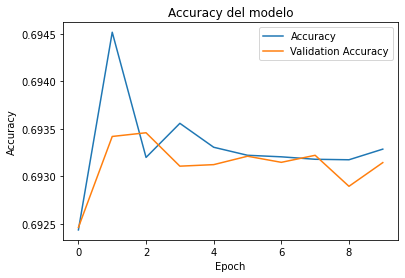

In [16]:
import matplotlib.pyplot as plt
#plt.plot(hist.history["acc"])
#plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Accuracy del modelo")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
# bajar una imagen de ejemplo de internet
img = image.load_img("ejemplo.jpeg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')